## 作業二：Space Titanic for submission

In [91]:
# model using
import joblib
model_pretrained = joblib.load('C:\ML1121\Spaceship Titanic\Spaceship-LR-20231114.pkl')
import pandas as pd

In [92]:
# for submission 
df_test = pd.read_csv("test.csv")
df_ID = df_test['PassengerId']

### 把Submission的資料變成原檔案的資料形狀

In [93]:
# 將不需要的column刪掉
df_test.drop(['Name','PassengerId'],axis=1,inplace=True)
df_test.drop(['HomePlanet','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','VIP'],axis=1,inplace=True)

In [94]:
# 檢查要分析的樣本中是否有空值大於一半的情形
df_test.isnull().sum() > len(df_test)/2

CryoSleep      False
Cabin          False
Destination    False
Age            False
dtype: bool

### 資料處理

#### Destination

In [95]:
# 將目的地缺失值以最多數填補
df_test['Destination'].value_counts().idxmax()
df_test['Destination'].fillna(df_test['Destination'].value_counts().idxmax(),inplace=True)
# 因為Destination的值非0、1，需要把各項分開才能進行機器學習
df_test = pd.get_dummies(data=df_test, dtype = int, columns= ['Destination'])

#### Age

In [96]:
# 將年齡缺失值以中位數填補
df_test['Age'].isnull().value_counts()
median_age = df_test['Age'].median()
df_test['Age'].fillna(median_age, inplace=True)

#### CryoSleep 

In [97]:
# 將缺失值以最多數填補
df_test['CryoSleep'].value_counts().idxmax()
df_test['CryoSleep'].fillna(df_test['CryoSleep'].value_counts().idxmax(),inplace=True)
# 形式為True or False，需要將其轉換為數字
df_test = pd.get_dummies(data=df_test, dtype = int, columns= ['CryoSleep'])

#### Cabin

In [98]:
# 空值以最多少數填補(假設座位數相同，少的值可視為缺失)
df_test[['desk', 'num', 'side']] = df_test['Cabin'].str.split('/', expand=True)
df_test['Cabin'].value_counts().idxmin()
df_test['Cabin'].fillna(df_test['Cabin'].value_counts().idxmax(),inplace=True)

# 分類資料，並將不需要之資料刪除
df_test = pd.get_dummies(data=df_test, dtype = int, columns= ['desk'])
df_test.drop(['side'],axis=1,inplace = True)
df_test.drop(['num'],axis=1,inplace = True)
df_test.drop(['Cabin'],axis=1,inplace = True)

資料處理完後確認資料無誤

In [99]:
df_test.isnull().sum()

Age                          0
Destination_55 Cancri e      0
Destination_PSO J318.5-22    0
Destination_TRAPPIST-1e      0
CryoSleep_False              0
CryoSleep_True               0
desk_A                       0
desk_B                       0
desk_C                       0
desk_D                       0
desk_E                       0
desk_F                       0
desk_G                       0
desk_T                       0
dtype: int64

### 機器學習

In [102]:
predictions2 = model_pretrained.predict(df_test)
len(predictions2)


4277

In [104]:
forSubmissionDF = pd.DataFrame(columns = ['PassengerID','Transported'])
forSubmissionDF['PassengerID'] = df_ID
forSubmissionDF['Transported'] = predictions2

forSubmissionDF.to_csv('Space titanic_for_sumbmission_20231114.csv',index=False)

最後丟入kaggle的分析結果為：
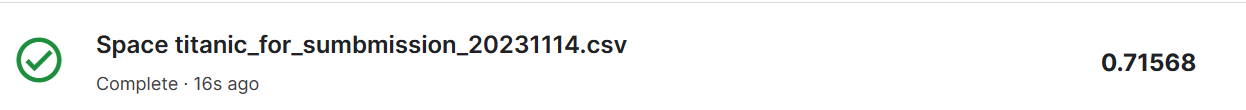